In [374]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error


#from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble

In [340]:
df = pd.read_csv("hypertension_data.csv")

In [341]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,hr,ang,oldpeak,slope,ca,thal,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [342]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,hr,ang,oldpeak,slope,ca,thal,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [343]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,hr,ang,oldpeak,slope,ca,thal,target
26078,72,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0
26082,67,0.0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [344]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'hr', 'ang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  int64  
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   hr        26083 non-null  int64  
 8   ang       26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.8 MB


In [346]:
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
hr           0
ang          0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [347]:
rows = len(df.axes[0])
print(rows)

26083


In [348]:
cols = len(df.axes[1])
print(cols)

14


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

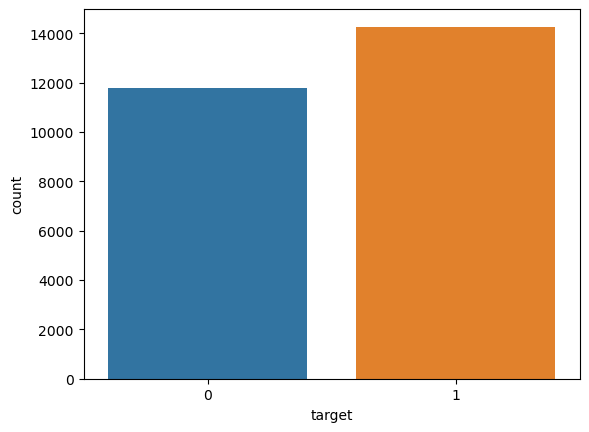

In [349]:
seaborn.countplot(df['target'])

In [350]:
df['sex'] =df['sex'].fillna(2)

In [351]:
df['sex'].isnull().sum()

0

In [352]:
data0 = df[df['target'] == 0]
data1 = df[df['target'] == 1]
total_0 = data0["target"].count()
total_1 = data1["target"].count()
print("Number of 0 data:",total_0)
print("Number of 1 data:",total_1)

pct_0 = total_0 / (total_0 + total_1) * 100
pct_1 = total_1 / (total_0 + total_1) * 100
print("Number of O data = ",pct_0,"%")
print("Number of 1 data = ",pct_1,"%")

Number of 0 data: 11809
Number of 1 data: 14274
Number of O data =  45.274699996166085 %
Number of 1 data =  54.72530000383391 %


In [353]:
target=df['target']

# spilt dataset into training and testing

In [354]:
training, testing = train_test_split(df, test_size=0.3, shuffle=True, random_state=32, stratify=target)

print(pd.value_counts(training['target']))
print(pd.value_counts(testing['target']))

1    9992
0    8266
Name: target, dtype: int64
1    4282
0    3543
Name: target, dtype: int64


In [355]:
train_x,test_y=train_test_split(df,test_size=0.3,stratify=df['target'])
total_0 = training[training['target'] == 1].shape[0]
total_1 = training[training['target'] == 0].shape[0]
ratio = total_0 / total_1
print("0 data:", total_0)
print("1 data :", total_1)
print("1 data ratio:", total_0/(total_0+total_1)*100)
print("0 data ratio:", total_1/(total_0+total_1)*100)

0 data: 9992
1 data : 8266
1 data ratio: 54.72669514733267
0 data ratio: 45.27330485266732


# separate the target variables from training data

In [356]:
train_x = training.drop(columns=['target'],axis=1)
train_y = training['target']

# separate the target variables from test data

In [357]:
test_x = testing.drop(columns=['target'],axis=1)
test_y = testing['target']

# Building a model

In [358]:
model = RandomForestClassifier()
model.fit(train_x , train_y)

RandomForestClassifier()

In [359]:
y_pred = model.predict(test_x)

In [360]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


# Manual calculation

In [361]:
TP, FN, FP, TN = c.reshape(-1)
print('outcome: \n', TP, FN, FP, TN)

outcome: 
 3543 0 0 4282


In [362]:
print('\nAccuracy: ', (TP+TN)/(TP+FN+TN+FP))

precision=TP/(FP+TP)
print('\nPrecision: ', precision)

recall=TP/(FN+TP)
print('\nRecall: ', recall)

print('\nF1score: ', (2*precision*recall/(precision+recall)))


Accuracy:  1.0

Precision:  1.0

Recall:  1.0

F1score:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


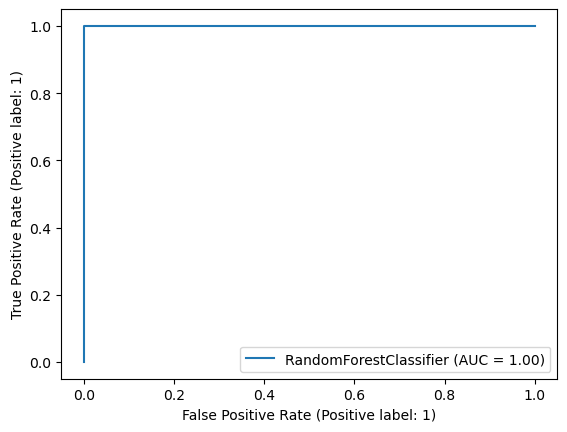

In [363]:
disp = plot_roc_curve(model, test_x, test_y)
plt.show()

# Naive Bayes

In [364]:
model = GaussianNB()
model.fit(train_x , train_y)

GaussianNB()

In [365]:
y_pred = model.predict(test_x)

In [366]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 0.8217252396166134
Precision: 0.8253324318233041
Recall: 0.8552078468005605
F1 Score: 0.8400045876820736
AUC Score: 0.8182333335047116
[[2768  775]
 [ 620 3662]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


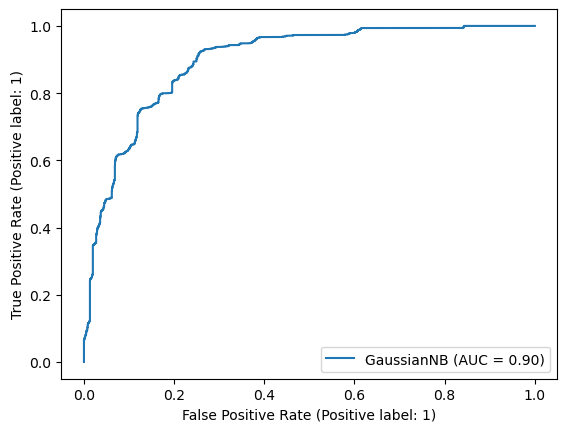

In [367]:
disp = plot_roc_curve(model, test_x, test_y)
plt.show()

# k-Nearest-Neighbors

In [368]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_x , train_y)

KNeighborsClassifier(n_neighbors=1)

In [369]:
y_pred = model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [370]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


# SVM

In [371]:
model = SVC(kernel = 'linear', C = 1)
model.fit(train_x, train_y)

SVC(C=1, kernel='linear')

In [372]:
pred = model.predict(test_x)

In [373]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]


# Decision Tree

In [375]:
model =  DecisionTreeClassifier()
model.fit(train_x , train_y)

DecisionTreeClassifier()

In [376]:
pred = model.predict(test_x)

In [377]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
auc = roc_auc_score(test_y, y_pred)
c = confusion_matrix(test_y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
[[3543    0]
 [   0 4282]]
